***
Make sure you download `diamonds.csv` first.

It is a rather large dataset, runtimes will not be trivial.

In [2]:
from math import log2
from statistics import mean
from subprocess import call

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    silhouette_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    train_test_split,
)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

# load the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/CMPT318/diamonds.csv")


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


| Column    | Description                                                                                       |
|-----------|---------------------------------------------------------------------------------------------------|
| `price`   | price in US dollars (\$326--\$18,823)                                                             |
| `carat`   | weight of the diamond (0.2--5.01)                                                                 |
| `cut`     | quality of the cut (Fair, Good, Very Good, Premium, Ideal)                                        |
| `color`   | diamond colour, from J (worst) to D (best)                                                        |
| `clarity` | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| `x`       | length in mm (0--10.74)                                                                           |
| `y`       | width in mm (0--58.9)                                                                             |
| `z`       | depth in mm (0--31.8)                                                                             |
| `depth`   | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)                                |
| `table`   | width of top of diamond relative to widest point (43--95)                                         |

![](https://www.anglodiamond.com/media/wysiwyg/Anglo-DiamondAnatomy_03.jpg)
[Source](https://www.anglodiamond.com/anglo_diamond_anatomy)

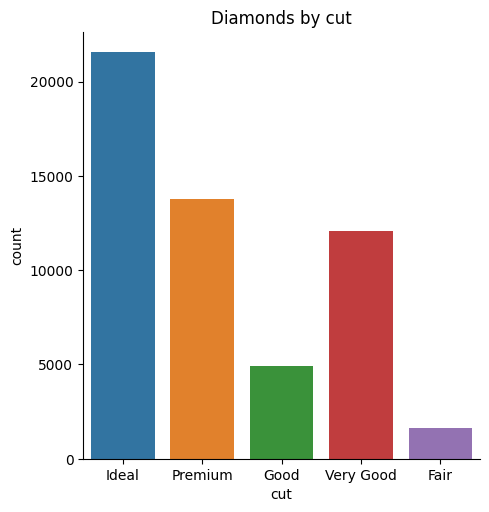

In [5]:
sns.catplot(data=df, x="cut", kind="count")
plt.title("Diamonds by cut")
plt.show()

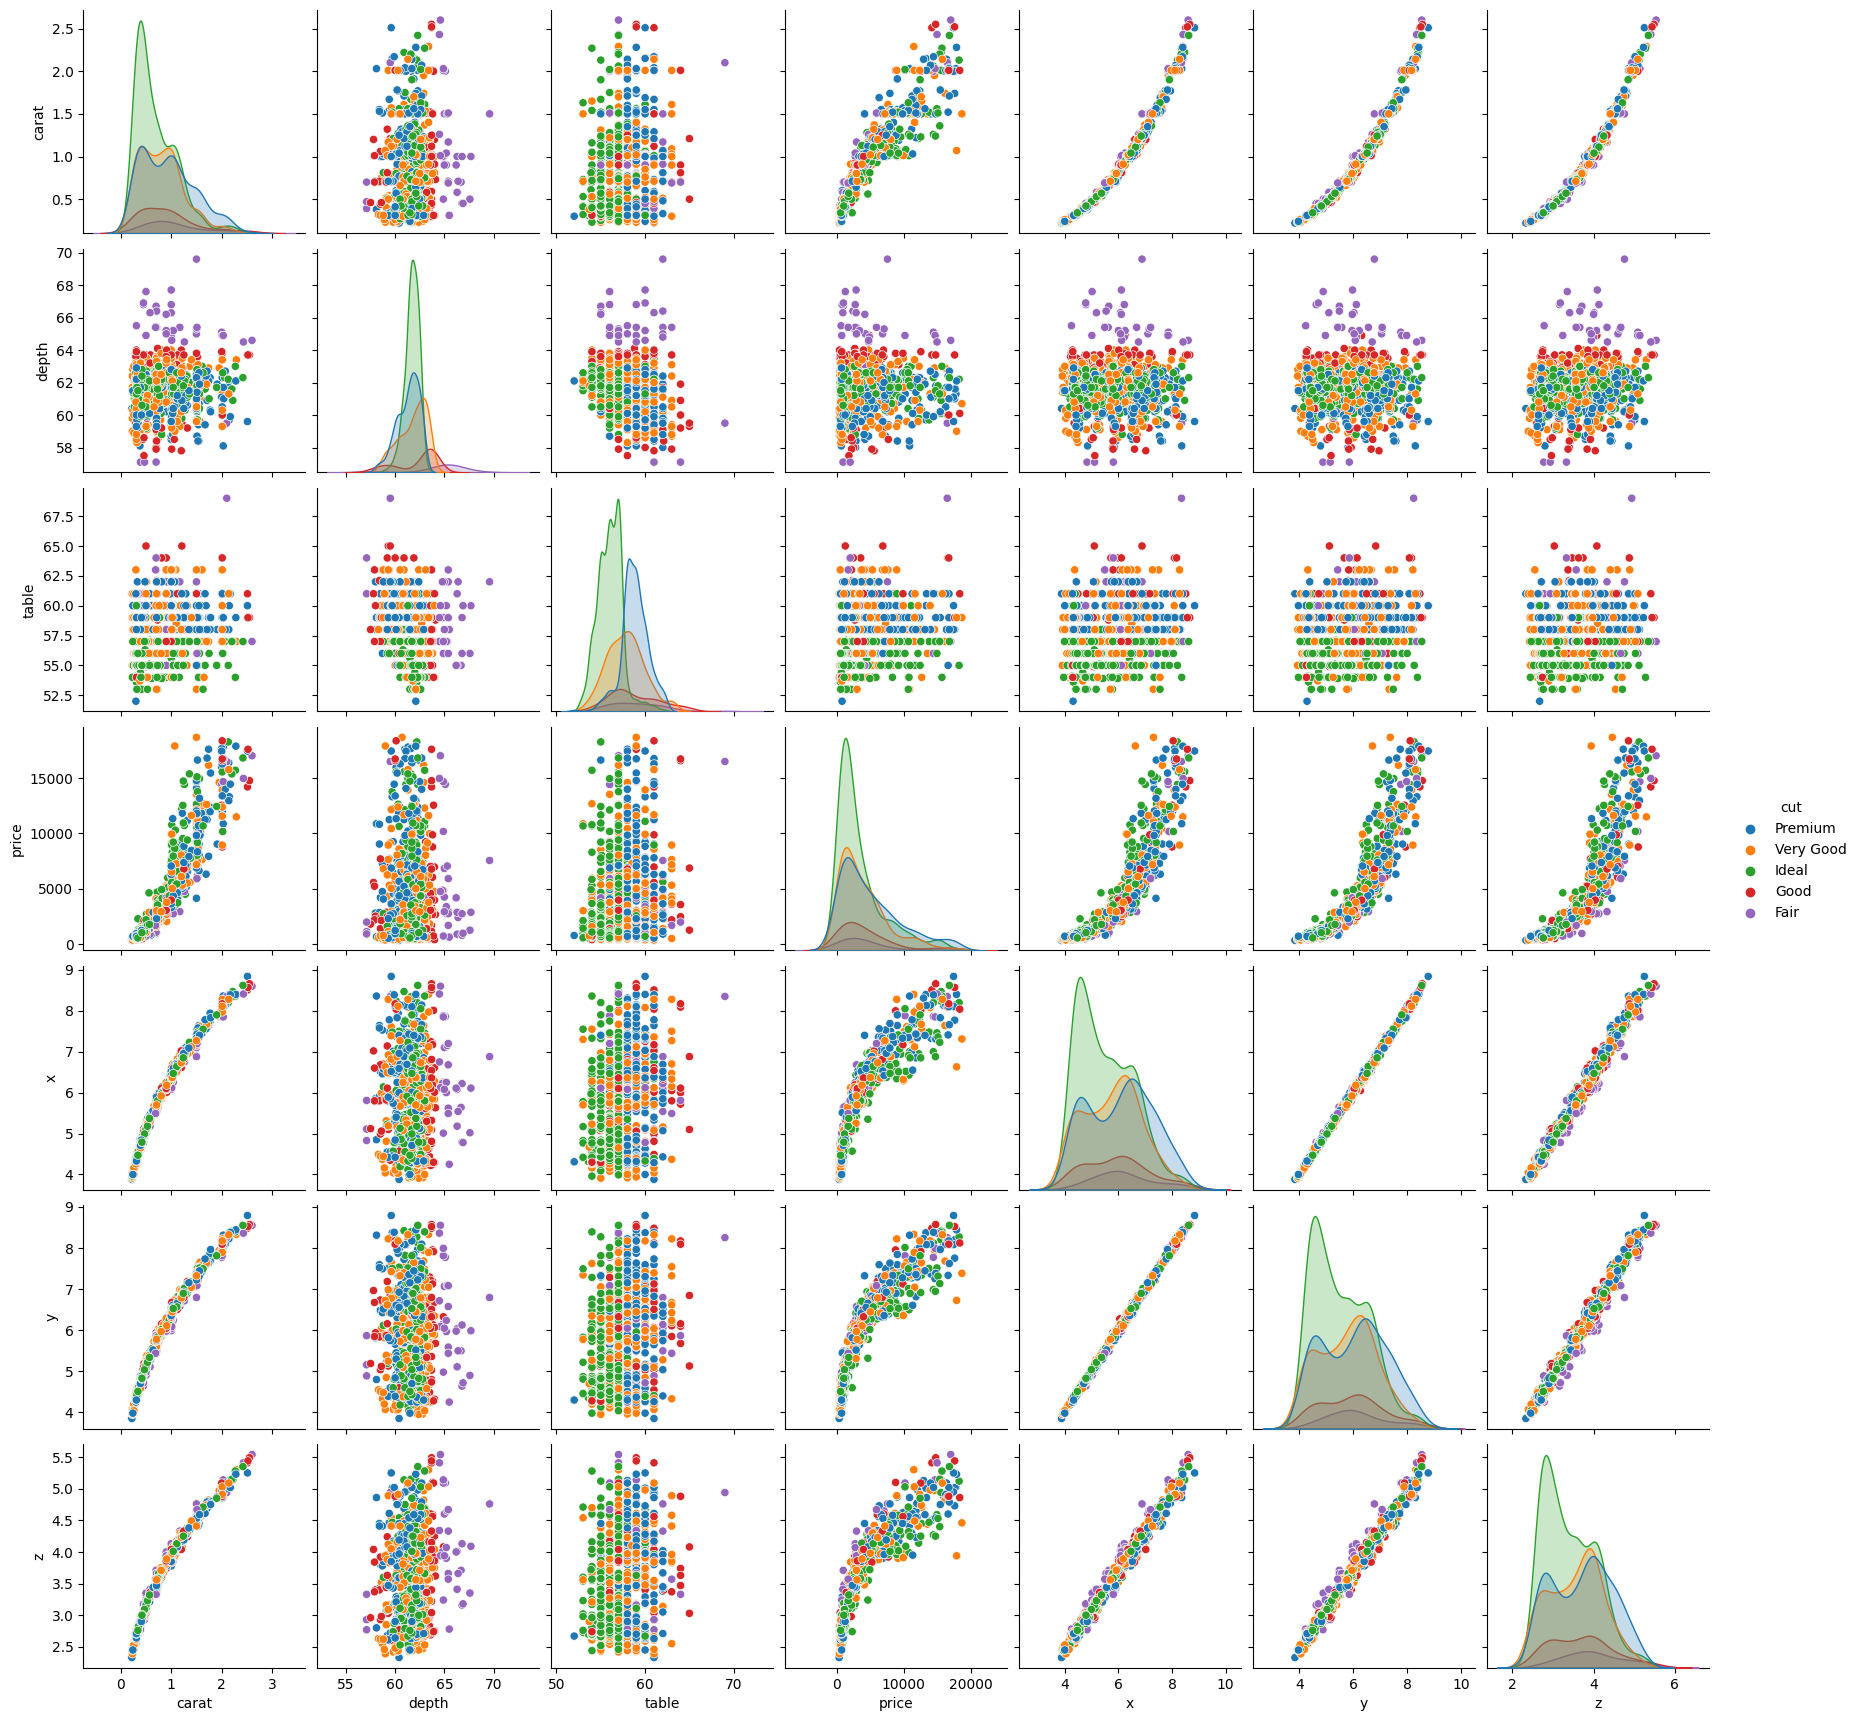

In [6]:
# Using .sample() to reduce runtimes.
sns.pairplot(data=df.sample(1000), hue="cut")

## Question 1

***

Use this dataset to classify these diamonds by `cut`. Here are a few steps to help you along. Short answers encouraged. Long answers will be accepted with a small, well set diamond.

1. Data Preprocessing - What steps will you take? Why or Why not?
  - For preprocessing data, I loaded the dataset first. Then I transformed some columns, such as the cut column. Then I dropped that column, to get it separated by itself.

2. Train Test Split
3. Classification Algorithm - What Algorithm are you using? Why?
  - I used the SVC classification algorithm.

4. Present your results with a confusion matrix, and score.

In [7]:
# TODO: Data Preprocessing
# use DT's, SVM, or kNN

# Using SVM
df = sns.load_dataset("diamonds")
df = df.dropna()

le = LabelEncoder()
oe = OrdinalEncoder().set_output(transform="pandas")

df["cut"] = le.fit_transform(df["cut"])
df[["color", "clarity"]] = oe.fit_transform(df[["color", "clarity"]])

x = df.drop(["cut"], axis=1)
y = df["cut"]

In [8]:
# TODO: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
x.describe().T

scaler = StandardScaler()

# Scale both X_train and X_test
x = scaler.fit_transform(x)
col_names = [
    "carat",
    "color",
    "clarity",
    "depth",
    "table",
    "price",
    "x",
    "y",
    "z",
]
scaled_x = pd.DataFrame(x, columns=col_names)
scaled_x.describe().T

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.1)

In [9]:
# TODO: Classification implementation
svm_classifier = SVC()
svm_classifier.get_params()

svm_classifier.fit(x_train, y_train)

SVC()

In [10]:
# TODO: Classification score(s)
svm_classifier.score(x_test, y_test)

0.74990730441231

In [11]:
# TODO: Confusion Matrix
print(
    classification_report(
        y_test, svm_classifier.predict(x_test), target_names=le.classes_
    )
)

              precision    recall  f1-score   support

        Fair       0.93      0.75      0.83       173
        Good       0.70      0.60      0.65       477
       Ideal       0.80      0.92      0.86      2199
     Premium       0.73      0.78      0.76      1370
   Very Good       0.61      0.45      0.52      1175

    accuracy                           0.75      5394
   macro avg       0.76      0.70      0.72      5394
weighted avg       0.74      0.75      0.74      5394



## Question 2

***
Clutering using K-Means

1. Perform K-means clustering on the dataset using a suitable number of clusters (you can decide the optimal number or explore various options).
2. Select 2 attributes from the dataset and visualize the results of the K-means clustering to show how diamonds are grouped based on these attributes. You can use scatter plots.
3. Analyze the characteristics of each cluster to gain insights into the types of diamonds within each group. What can you infer about the clusters?



In [29]:
# TODO: K-Means implementation
# use clustering of k-means

# Scale both X_train and X_test
scaler = StandardScaler()

x = scaler.fit_transform(x)
col_names = [
    "carat",
    "color",
    "clarity",
    "depth",
    "table",
    "price",
    "x",
    "y",
    "z",
]
scaled_df = pd.DataFrame(x, columns=col_names)
scaled_df.describe().T

x_train, x_test, y_train, y_test = train_test_split(
    scaled_df, y, test_size=0.10, random_state=123
)

x_train

kmeans = KMeans(n_clusters=5, random_state=123, n_init="auto")
kmeans.fit(x_train)

KMeans(n_clusters=5, n_init='auto', random_state=123)

<Axes: ylabel='carat'>

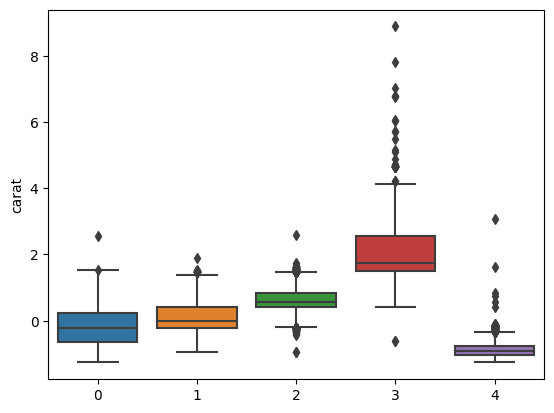

In [40]:
sns.boxplot(x=kmeans.labels_, y=x_train["carat"])

<Axes: ylabel='price'>

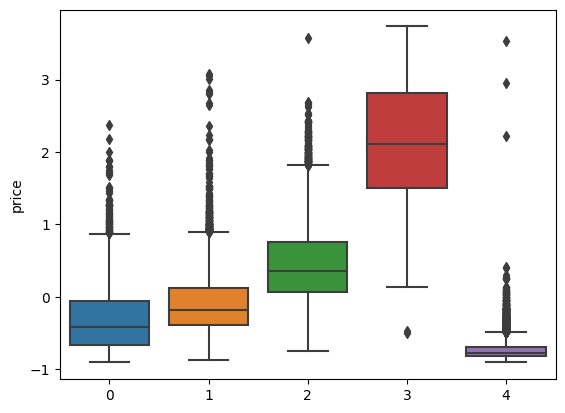

In [39]:
sns.boxplot(x=kmeans.labels_, y=x_train["price"])

<Axes: xlabel='carat', ylabel='price'>

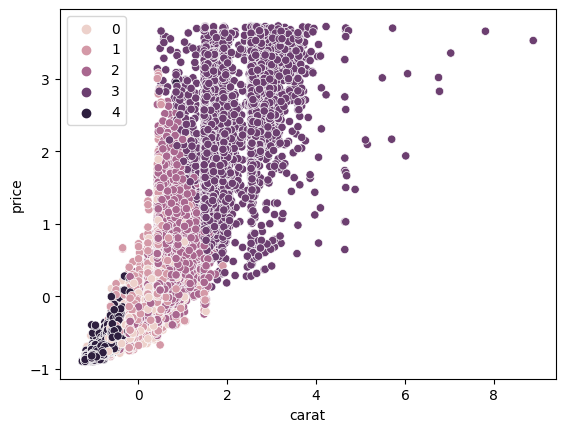

In [38]:
# TODO: Scatter plot
sns.scatterplot(
    data=x_train, x="carat", y="price", hue=kmeans.labels_
)

Analyze the characteristics of each cluster to gain insights into the types of diamonds within each group. What can you infer about the clusters?

Answer here
- We can infer from the clusters that, with a lower carat, the diamond will cost a lower price. As the carat of the diamond increases, so will the price of the diamond.